In [1]:
import keras
import os
import shutil
import numpy as np
import matplotlib
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# resim boyutu, epoch ve batch size değişkenleri
img_width, img_height = 480, 640
first_epochs = 5
second_epochs = 30
batch_size = 5
train_samples=120
validation_samples=40
input_shape = (img_width, img_height, 3)

In [3]:
# resim dosyalarının olduğu dizinler
original_tu_path='c:\\Users\Dell\Desktop\ThumbsUp\ThumbsUp\Tarık'
original_td_path='c:\\Users\Dell\Desktop\ThumbsUp\ThumbsDown\Tarık'

# resim dosyalarının ayrılacağı dizinler için klasörleri oluşturuyoruz
base_dataset_path='c:\\Users\Dell\Desktop\dataset'
os.makedirs(base_dataset_path,777)

# train dizini
train_path=os.path.join(base_dataset_path,'train')
os.makedirs(train_path,777)

# test dizini
test_path=os.path.join(base_dataset_path,'test')
os.makedirs(test_path,777)

# validation dizini
val_path=os.path.join(base_dataset_path,'val')
os.makedirs(val_path,777)

# thumbs down train dizini
train_td_path=os.path.join(train_path,'thumbs_down')
os.makedirs(train_td_path,777)

# thumbs up train dizini
train_tu_path=os.path.join(train_path,'thumbs_up')
os.makedirs(train_tu_path,777)

# thumbs down test dizini
test_td_path=os.path.join(test_path,'thumbs_down')
os.makedirs(test_td_path,777)

# thumbs up test dizini
test_tu_path=os.path.join(test_path,'thumbs_up')
os.makedirs(test_tu_path,777)

# thumbs down validation dizini
val_td_path=os.path.join(val_path,'thumbs_down')
os.makedirs(val_td_path,777)

# thumbs up validation dizini
val_tu_path=os.path.join(val_path,'thumbs_up')
os.makedirs(val_tu_path,777)


In [4]:
# dizinden tüm resimlerin pathlerini listeye alıp listeyi karıştırıyoruz 
tu_img_names=os.listdir(original_tu_path)
np.random.shuffle(tu_img_names)

td_img_names=os.listdir(original_td_path)
np.random.shuffle(td_img_names) 

In [5]:
# veriyi parçalara ayırıp oluşturduğumuz dizinlere yerleştiriyoruz. Parçalama oranı 60train:20test:20validation

for img_path in tu_img_names[:60]:
    src = os.path.join(original_tu_path, img_path)
    dst = os.path.join(train_tu_path, img_path)
    shutil.copyfile(src,dst)

for img_path in tu_img_names[60:80]:
    src = os.path.join(original_tu_path, img_path)
    dst = os.path.join(test_tu_path, img_path)
    shutil.copyfile(src,dst)

for img_path in tu_img_names[80:]:
    src = os.path.join(original_tu_path, img_path)
    dst = os.path.join(val_tu_path, img_path)
    shutil.copyfile(src,dst)
    
for img_path in td_img_names[:60]:
    src = os.path.join(original_td_path, img_path)
    dst = os.path.join(train_td_path, img_path)
    shutil.copyfile(src,dst)
    
for img_path in td_img_names[60:80]:
    src = os.path.join(original_td_path, img_path)
    dst = os.path.join(test_td_path, img_path)
    shutil.copyfile(src,dst)
    
for img_path in td_img_names[80:]:
    src = os.path.join(original_td_path, img_path)
    dst = os.path.join(val_td_path, img_path)
    shutil.copyfile(src,dst)

In [6]:
# Modeli oluşturup katmanları ekliyoruz.

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape = input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# iki sınıf olduğu için binary loss fonksiyonu seçiyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [8]:
# Her katmanda resim daha da küçülüp öznitelikleri anlaşılmaya çalışılıyor.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 478, 638, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 239, 319, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 237, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 118, 158, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 78, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 76, 128)       73856     
__________

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [10]:
# generatorden gelen veriyi ve verinin sınıfları inceliyoruz. 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break
    

data batch shape: (5, 480, 640, 3)
labels batch shape: (5,)
[1. 1. 1. 0. 0.]
data batch shape: (5, 480, 640, 3)
labels batch shape: (5,)
[1. 0. 1. 1. 0.]


In [11]:
# modeli eğitiyoruz. epoch adımını örnek sayımıza göre seçiyoruz.
history = model.fit_generator(train_generator, 
    steps_per_epoch = 100,
    epochs = first_epochs,
    validation_data = validation_generator, 
    validation_steps = 50)

Epoch 1/5
100/100 [==============================] - 22s 216ms/step - loss: 0.3620 - acc: 0.8420 - val_loss: 0.0748 - val_acc: 0.9760
Epoch 2/5
100/100 [==============================] - 16s 161ms/step - loss: 0.0930 - acc: 0.9660 - val_loss: 0.2054 - val_acc: 0.9200
Epoch 3/5
100/100 [==============================] - 16s 164ms/step - loss: 0.0308 - acc: 0.9940 - val_loss: 0.1608 - val_acc: 0.9560
Epoch 4/5
100/100 [==============================] - 16s 165ms/step - loss: 0.0257 - acc: 0.9920 - val_loss: 1.9843 - val_acc: 0.7720
Epoch 5/5
100/100 [==============================] - 16s 163ms/step - loss: 0.0189 - acc: 0.9920 - val_loss: 0.1123 - val_acc: 0.9760


In [12]:
# modeli diskimize kaydediyoruz
model.save('thumbs_11.h5')

In [13]:
# modelimizin metriklerini inceliyoruz.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('accuracy :',acc,'\nvalidation accuracy :',
      val_acc,'\nloss :',loss,'\nvalidation loss :',val_loss)

accuracy : [0.842000005543232, 0.9660000020265579, 0.9940000003576279, 0.9920000004768371, 0.9920000004768371] 
validation accuracy : [0.9760000014305115, 0.9200000047683716, 0.9560000026226043, 0.7720000123977662, 0.9760000014305115] 
loss : [0.36203148402739316, 0.09300915970350615, 0.030756834265749548, 0.025703734807997307, 0.01886649495439542] 
validation loss : [0.07478764217346906, 0.20540286760122398, 0.16079270285696112, 1.9843331698713387, 0.11229616117365694]


In [14]:
CATEGORIES=['thumbs_down','thumbs_up']
# bu fonksiyon gelen resmi kullanıma hazır hale getiriyor(genelde test için kullanıyorum)
def prepare_img(path):
    img_array=cv2.imread(path)
    new_array=cv2.resize(img_array,(480,640))
    return new_array.reshape(-1,480,640,3)

# diske kaydettiğim modeli yüklüyorum
model2=tf.keras.models.load_model('thumbs_11.h5')

In [15]:
# modelime tahmin yaptırıyorum
predictions = []
for img in os.listdir(test_td_path):
    img=prepare_img(test_td_path+'\\'+img)
    predictions.append([model2.predict(img),0])
for img in os.listdir(test_tu_path):
    img = prepare_img(test_tu_path+('\\')+img)
    predictions.append([model2.predict(img),1])

In [16]:
accuracy=0
# Yüzdelik tahmin başarısını ve tahminlerle gerçek değerleri ekrana yazdırıyorum. 
for i,x in enumerate(predictions):
    print(CATEGORIES[int(x[0])],' X ',CATEGORIES[x[1]])
    if(int(x[0])==x[1]):
        accuracy+=1

accuracy=accuracy/len(predictions)
print('% ',accuracy*100)

thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_up  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_up  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  th

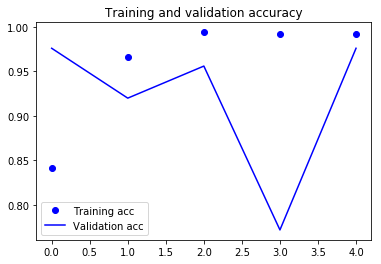

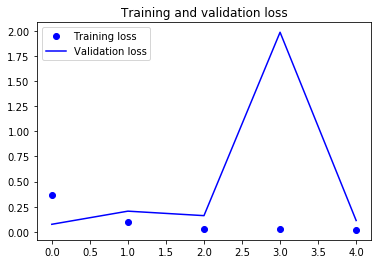

In [17]:
# veriler az olduğu için validation verileri yanıltıcı olabiliyor.
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
CATEGORIES=['thumbs_up','thumbs_down']
# bu fonksiyon gelen resmi kullanıma hazır hale getiriyor(genelde test için kullanıyorum)
def prepare_img(path):
    img_array=cv2.imread(path)
    new_array=cv2.resize(img_array,(480,640))
    return new_array.reshape(-1,480,640,3)

# diske kaydettiğim en başarılı modeli yüklüyorum
model2=tf.keras.models.load_model('thumbs_1.h5')


In [19]:
# test dizinindeki tüm resimleri listeye yüklüyorum.
predictions = []
for img in os.listdir(test_td_path):
    img=prepare_img(test_td_path+'\\'+img)
    predictions.append([model2.predict(img),0])
for img in os.listdir(test_tu_path):
    img = prepare_img(test_tu_path+('\\')+img)
    predictions.append([model2.predict(img),1])

In [20]:
accuracy=0
# model, yüklenmiş listedeki resimleri tahmin etmeye çalışıyor ve en sonda yüzdelik tahmin başarısını ekrana yazdırıyor. 
for i,x in enumerate(predictions):
    print(CATEGORIES[int(x[0])],' X ',CATEGORIES[x[1]])
    if(int(x[0])==x[1]):
        accuracy+=1

accuracy=accuracy/len(predictions)
print('% ',accuracy*100)

thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_up  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_up
thumbs_down  X  thumbs_down
thumbs_up  X  thumbs_down
thumbs_up  X  thumbs_down
thumbs_up  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_up  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_down  X  thumbs_down
thumbs_up  X  thumbs_down
thumbs_down  X  thum

In [ ]:
# Bu model biraz şansa bağlı. Random şekilde karıştırıp random şekilde ayırıyorum ancak verisetim yetersiz geliyor.
# Başarıyı arttırmak ve tutarlı bir model elde etmek için dropout ve data augmentation yollarına başvurmam gerekli.

In [21]:
# İkinci deneme

model3=models.Sequential()

model3.add(layers.Conv2D(16, (3, 3),input_shape=(img_width,img_height,3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(512, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [22]:
from keras import optimizers
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [23]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 478, 638, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 239, 319, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 237, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 118, 158, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 116, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 58, 78, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 76, 128)       73856     
__________

In [24]:
# train datasını zenginleştirme ayarları
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')


Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [25]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

data batch shape: (5, 480, 640, 3)
labels batch shape: (5,)
[0. 0. 1. 0. 1.]
data batch shape: (5, 480, 640, 3)
labels batch shape: (5,)
[0. 0. 1. 0. 1.]


In [26]:
history = model3.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=second_epochs,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
50/50 [==============================] - 29s 584ms/step - loss: 0.6524 - acc: 0.6280 - val_loss: 0.4266 - val_acc: 0.8240
Epoch 2/30
50/50 [==============================] - 27s 535ms/step - loss: 0.4826 - acc: 0.7800 - val_loss: 0.2862 - val_acc: 0.9200
Epoch 3/30
50/50 [==============================] - 30s 593ms/step - loss: 0.3805 - acc: 0.8480 - val_loss: 0.3289 - val_acc: 0.8800
Epoch 4/30
50/50 [==============================] - 31s 615ms/step - loss: 0.3542 - acc: 0.8440 - val_loss: 0.2937 - val_acc: 0.8360
Epoch 5/30
50/50 [==============================] - 31s 625ms/step - loss: 0.2726 - acc: 0.9120 - val_loss: 0.2426 - val_acc: 0.8760
Epoch 6/30
50/50 [==============================] - 32s 641ms/step - loss: 0.2917 - acc: 0.8880 - val_loss: 0.2498 - val_acc: 0.8760
Epoch 7/30
50/50 [==============================] - 32s 648ms/step - loss: 0.2440 - acc: 0.9080 - val_loss: 0.1481 - val_acc: 0.9240
Epoch 8/30
50/50 [==============================] - 32s 646ms/step - 

In [27]:
model3.save('thumbs_2.h5')

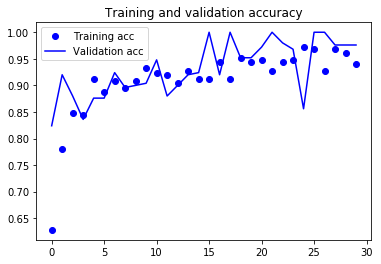

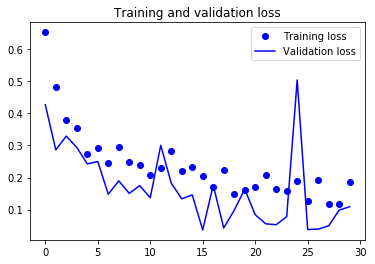

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# Üçüncü denemede bu sefer dropout ekliyoruz

model4=models.Sequential()

model4.add(layers.Conv2D(16, (3, 3),input_shape=(img_width,img_height,3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.1))

model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.1))

model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2))

model4.add(layers.Conv2D(512, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [33]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 478, 638, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 239, 319, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 239, 319, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 237, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 118, 158, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 118, 158, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 116, 156, 64)      18496     
__________

In [34]:
history = model4.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=second_epochs,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
50/50 [==============================] - 32s 645ms/step - loss: 0.6767 - acc: 0.5680 - val_loss: 0.6202 - val_acc: 0.8000
Epoch 2/30
50/50 [==============================] - 28s 558ms/step - loss: 0.5228 - acc: 0.7600 - val_loss: 0.4504 - val_acc: 0.7800
Epoch 3/30
50/50 [==============================] - 32s 650ms/step - loss: 0.4994 - acc: 0.7680 - val_loss: 0.3623 - val_acc: 0.8960
Epoch 4/30
50/50 [==============================] - 32s 643ms/step - loss: 0.3886 - acc: 0.8480 - val_loss: 0.2790 - val_acc: 0.8960
Epoch 5/30
50/50 [==============================] - 28s 562ms/step - loss: 0.3622 - acc: 0.8600 - val_loss: 0.2556 - val_acc: 0.9280
Epoch 6/30
50/50 [==============================] - 31s 620ms/step - loss: 0.2947 - acc: 0.8520 - val_loss: 0.3000 - val_acc: 0.9040
Epoch 7/30
50/50 [==============================] - 31s 629ms/step - loss: 0.3001 - acc: 0.9000 - val_loss: 0.3061 - val_acc: 0.8920
Epoch 8/30
50/50 [==============================] - 30s 594ms/step - 

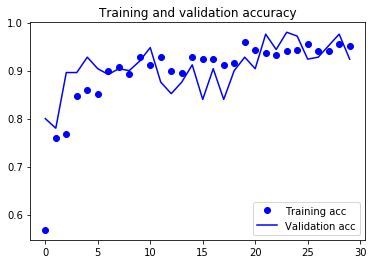

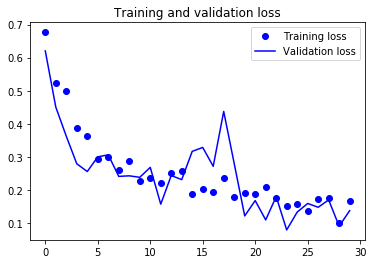

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
# Dördüncü denemede bu sefer ağırlık regülasyonu yaptırıyoruz

from keras.regularizers import l2

model5=models.Sequential()

model5.add(layers.Conv2D(16, (3, 3),kernel_regularizer=l2(0.001),input_shape=(img_width,img_height,3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(32, (3, 3),kernel_regularizer=l2(0.001), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(64, (3, 3),kernel_regularizer=l2(0.001), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(128, (3, 3),kernel_regularizer=l2(0.001), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(256, (3, 3),kernel_regularizer=l2(0.001), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(512, (3, 3),kernel_regularizer=l2(0.001), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))



In [42]:
model5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 478, 638, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 239, 319, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 237, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 118, 158, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 116, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 58, 78, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 56, 76, 128)       73856     
__________

In [43]:
history = model5.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=second_epochs,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
50/50 [==============================] - 37s 746ms/step - loss: 1.2556 - acc: 0.5480 - val_loss: 1.0858 - val_acc: 0.8320
Epoch 2/30
50/50 [==============================] - 32s 649ms/step - loss: 1.0103 - acc: 0.7280 - val_loss: 0.8787 - val_acc: 0.7760
Epoch 3/30
50/50 [==============================] - 33s 659ms/step - loss: 0.8928 - acc: 0.7840 - val_loss: 0.7138 - val_acc: 0.8760
Epoch 4/30
50/50 [==============================] - 33s 650ms/step - loss: 0.7810 - acc: 0.8440 - val_loss: 0.5330 - val_acc: 0.9720
Epoch 5/30
50/50 [==============================] - 33s 660ms/step - loss: 0.7107 - acc: 0.8720 - val_loss: 0.4994 - val_acc: 0.9600
Epoch 6/30
50/50 [==============================] - 33s 658ms/step - loss: 0.6783 - acc: 0.8600 - val_loss: 0.5358 - val_acc: 0.9280
Epoch 7/30
50/50 [==============================] - 32s 646ms/step - loss: 0.6268 - acc: 0.8840 - val_loss: 0.4622 - val_acc: 0.9760
Epoch 8/30
50/50 [==============================] - 33s 660ms/step - 

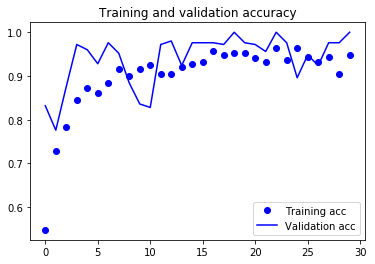

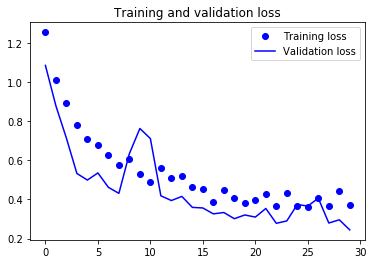

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
pwd

'C:\\Users\\Dell'